## **Using Transfer learning models**

Using Transfer Learning models like VGG16, VGG19, RESNET, INCEPTION and etc..

Weights used :- Imagenet

In [1]:
#Import the required modules

import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt

import cv2

from keras.models import *
from keras.layers import *
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir UTKFace
# !unzip -qq /content/UTKFace.tar.gz
!tar -xf /content/drive/MyDrive/UTKFace.tar.gz -C UTKFace

In [4]:
path = "/content/UTKFace/UTKFace"
images=[]
age=[]
gender=[]

In [5]:

#Extracting images including ages and genders of each image
#Age and Gender are included in image name itself ( " [age]_[gender]_[race]_[date&time].jpg  " )
#For predicting age and gender we should extract it and append to array.

for img in os.listdir(path):
  ages = img.split("_")[0]
  genders = img.split("_")[1]
  img = cv2.imread(str(path)+"/"+str(img))
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(144,144))
  images.append(np.array(img))
  age.append(np.array(ages))
  gender.append(np.array(genders))

In [6]:
age = np.array(age,dtype=np.int64)
images = np.array(images) 
gender = np.array(gender,np.uint64)

In [7]:
#Splitting the data
x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(images, gender, random_state=42)

### **VGG16**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (144, 144, 3), include_top = False, weights = 'imagenet')

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from keras import layers

x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

gender_vgg16_model = tf.keras.models.Model(base_model.input, x)

In [ ]:
gender_vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 144, 144, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 144, 144, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 144, 144, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 72, 72, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 72, 72, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 72, 72, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 36, 36, 128)       0     

In [ ]:
gender_vgg16_model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
gender_vgg16_model_history = gender_vgg16_model.fit(x_train_gender, y_train_gender,validation_data=(x_test_gender, y_test_gender),epochs=50,batch_size=32)

### **VGG19**

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

vgg19_model = VGG19(input_shape = (144, 144, 3), include_top = False, weights = 'imagenet',classes=2)

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in vgg19_model.layers:
    layer.trainable = False

In [ ]:
from keras import layers

x = layers.Flatten()(vgg19_model.output)

# Add a fully connected layer with 128 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.3)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

gender_vgg19_model = tf.keras.models.Model(vgg19_model.input, x)

In [ ]:
gender_vgg19_model.summary()

In [ ]:
gender_vgg19_model.compile(optimizer = tf.keras.optimizers.Adam(epsilon=1e-07), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
gender_vgg19_model_history = gender_vgg19_model.fit(x_train_gender, y_train_gender,validation_data=(x_test_gender, y_test_gender),epochs=20,batch_size=32)

Epoch 1/20
556/556 [==============================] - 105s 120ms/step - loss: 1.0013 - acc: 0.8171 - val_loss: 0.3469 - val_acc: 0.8552
Epoch 2/20
556/556 [==============================] - 65s 118ms/step - loss: 0.3144 - acc: 0.8667 - val_loss: 0.3034 - val_acc: 0.8679
Epoch 3/20
556/556 [==============================] - 65s 117ms/step - loss: 0.2783 - acc: 0.8838 - val_loss: 0.2978 - val_acc: 0.8669
Epoch 4/20
556/556 [==============================] - 65s 118ms/step - loss: 0.2383 - acc: 0.8976 - val_loss: 0.3262 - val_acc: 0.8672
Epoch 5/20
556/556 [==============================] - 65s 118ms/step - loss: 0.2104 - acc: 0.9102 - val_loss: 0.3127 - val_acc: 0.8736
Epoch 6/20
556/556 [==============================] - 65s 118ms/step - loss: 0.1974 - acc: 0.9165 - val_loss: 0.3231 - val_acc: 0.8723
Epoch 7/20
556/556 [==============================] - 65s 118ms/step - loss: 0.1802 - acc: 0.9234 - val_loss: 0.3839 - val_acc: 0.8692
Epoch 8/20
556/556 [==============================] - 

### **RESNET 50**

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet_50_model = ResNet50(input_shape = (144, 144, 3), include_top = False, weights = 'imagenet',classes=2)

94765736/94765736 [==============================] - 3s 0us/step


In [10]:
for layer in resnet_50_model.layers:
    layer.trainable = False

In [11]:
from keras import layers

x = layers.Flatten()(resnet_50_model.output)

# Add a fully connected layer with 128 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.3)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

gender_resnet_50_model = tf.keras.models.Model(resnet_50_model.input, x)

In [ ]:
gender_resnet_50_model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(gender_resnet_50_model)

In [18]:
gender_resnet_50_model.compile(optimizer = tf.keras.optimizers.Adam(epsilon=1e-07), loss = 'binary_crossentropy',metrics = ['acc'])

In [19]:
gender_resnet_50_model_history = gender_resnet_50_model.fit(x_train_gender, y_train_gender,validation_data=(x_test_gender, y_test_gender),epochs=7,batch_size=60)

Epoch 1/7
297/297 [==============================] - 47s 116ms/step - loss: 0.9387 - acc: 0.8348 - val_loss: 0.2892 - val_acc: 0.8726
Epoch 2/7
297/297 [==============================] - 34s 116ms/step - loss: 0.2660 - acc: 0.8843 - val_loss: 0.2804 - val_acc: 0.8735
Epoch 3/7
297/297 [==============================] - 35s 117ms/step - loss: 0.2076 - acc: 0.9097 - val_loss: 0.2767 - val_acc: 0.8873
Epoch 4/7
297/297 [==============================] - 35s 117ms/step - loss: 0.1736 - acc: 0.9284 - val_loss: 0.3032 - val_acc: 0.8875
Epoch 5/7
297/297 [==============================] - 35s 118ms/step - loss: 0.1468 - acc: 0.9393 - val_loss: 0.3228 - val_acc: 0.8800
Epoch 6/7
297/297 [==============================] - 35s 118ms/step - loss: 0.1215 - acc: 0.9541 - val_loss: 0.3190 - val_acc: 0.8978
Epoch 7/7
297/297 [==============================] - 35s 118ms/step - loss: 0.1068 - acc: 0.9578 - val_loss: 0.3063 - val_acc: 0.8910


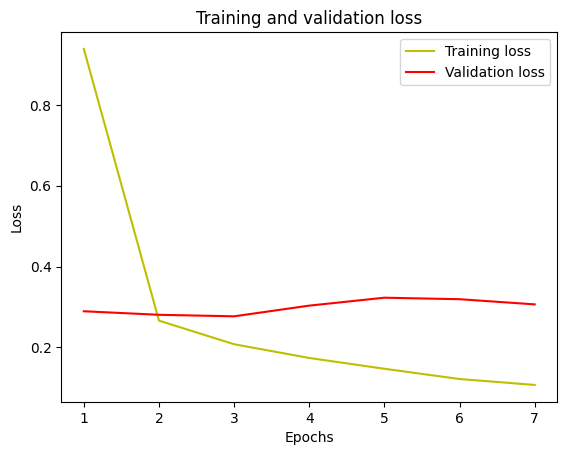

In [23]:
loss = gender_resnet_50_model_history.history['loss'] # loss plot for gender prediction model 
val_loss = gender_resnet_50_model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

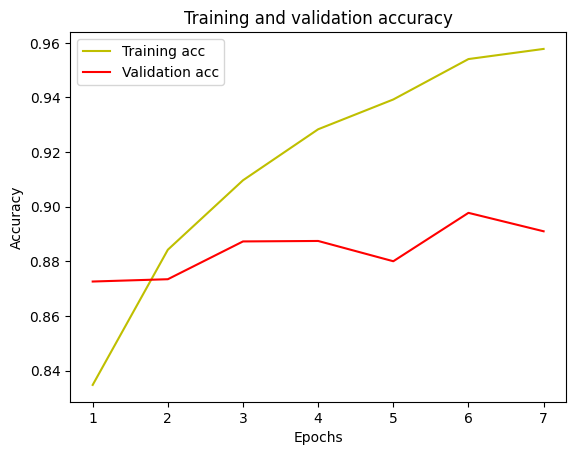

In [24]:
acc = gender_resnet_50_model_history.history['acc'] # accuracy plot training vs validation accuracy for gender prediction model.
#acc = history.history['accuracy']
val_acc = gender_resnet_50_model_history.history['val_acc']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
predictions = gender_resnet_50_model.predict(x_test_gender)
y_pred = (predictions>= 0.5).astype(int)[:,0]

from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test_gender, y_pred))
     

186/186 [==============================] - 10s 43ms/step
Accuracy =  0.8910072549350431


<Axes: >

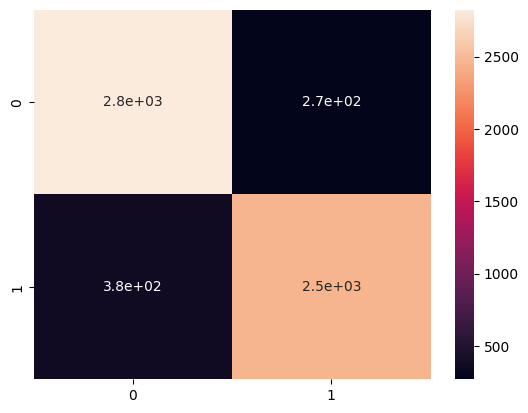

In [26]:

#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(y_test_gender, y_pred)  
sns.heatmap(cm, annot=True)